Part 1

In [2]:
 import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

Problem Statments
Github Repository: https://github.com/kl00135/SchoolRepository

Dataset link: https://www.kaggle.com/datasets/shariful07/student-mental-health?resource=download

This data describes the relation between the mental health of a student, to their GPA. By comparing acedemic status to features like if the student in question has anxeity, or panic attacks. 

Our main question is realizing if student's mental health has a real effect on their acedemic preformance. We will use the factor of depression in particular.

On the way, we can investigate these three sub-questions.

1. Out of each group, which year of students is depression issues more likely to effect?
2. Are male or female students effected more by depression?
3. Are depression, anxiety, or panic attacks most common in general?

Part 2

Data Cleaning

We don't need every single column here, as not every factor plays a role in our hypothesis. For example, the timestamp, marriage, and career columns of data has nothing to do with any of our questions and sub-questions. 



In [3]:
df = pd.read_csv('Student Mental Health.csv')
df.drop(columns=['Timestamp', 'What is your course?', 'Marital status'], inplace=True)
print(df)

    Choose your gender   Age Your current year of Study What is your CGPA?  \
0               Female  18.0                     year 1        3.00 - 3.49   
1                 Male  21.0                     year 2        3.00 - 3.49   
2                 Male  19.0                     Year 1        3.00 - 3.49   
3               Female  22.0                     year 3        3.00 - 3.49   
4                 Male  23.0                     year 4        3.00 - 3.49   
..                 ...   ...                        ...                ...   
96              Female  21.0                     year 1        3.50 - 4.00   
97                Male  18.0                     Year 2        3.00 - 3.49   
98              Female  19.0                     Year 3        3.50 - 4.00   
99              Female  23.0                     year 4        3.50 - 4.00   
100               Male  20.0                     Year 2        3.00 - 3.49   

    Do you have Depression? Do you have Anxiety? Do you have Pa

Data Cleaning 

Next we will check for any missing values, we can do this by using the dropna()feature to seek out null values. 

In [4]:
df.dropna(inplace=True)
print(df)

    Choose your gender   Age Your current year of Study What is your CGPA?  \
0               Female  18.0                     year 1        3.00 - 3.49   
1                 Male  21.0                     year 2        3.00 - 3.49   
2                 Male  19.0                     Year 1        3.00 - 3.49   
3               Female  22.0                     year 3        3.00 - 3.49   
4                 Male  23.0                     year 4        3.00 - 3.49   
..                 ...   ...                        ...                ...   
96              Female  21.0                     year 1        3.50 - 4.00   
97                Male  18.0                     Year 2        3.00 - 3.49   
98              Female  19.0                     Year 3        3.50 - 4.00   
99              Female  23.0                     year 4        3.50 - 4.00   
100               Male  20.0                     Year 2        3.00 - 3.49   

    Do you have Depression? Do you have Anxiety? Do you have Pa

Because every piece of data in our table is utalized, we can't remove anything that may resemble duplicate data. Each entity is a person, and those people may have simmilar answers, even though they seem the same at times, we still need to count them as valuable data. 

Data Cleaning

Our code is looking loads more clean now, getting rid of unnecessary detail makes analyzing the final data a lot easier. Next we're going to want to list the datatypes out to see if they're all correct.

In [5]:
print(df.dtypes)

Choose your gender                               object
Age                                             float64
Your current year of Study                       object
What is your CGPA?                               object
Do you have Depression?                          object
Do you have Anxiety?                             object
Do you have Panic attack?                        object
Did you seek any specialist for a treatment?     object
dtype: object


Because age cannot be a decimal number, we're going to convert it to a more ideal type, an int.

In [6]:
df['Age'] = df['Age'].astype(int)
print(df.dtypes)

Choose your gender                              object
Age                                              int32
Your current year of Study                      object
What is your CGPA?                              object
Do you have Depression?                         object
Do you have Anxiety?                            object
Do you have Panic attack?                       object
Did you seek any specialist for a treatment?    object
dtype: object


Everything else should be fine, as object classes are commonly used to story text data.

Data Cleaning

Our last step in cleaning, is to remove any inconsistencies. This may be anything from spelling mistakes in the catagory variables, to outliers in the numerical variables. After looking throughout the document, I haven't been able to spot any grammer mistakes within the inputs, and each integer stays between the boundries of 18 - 24. So there are no outliers. None the less, we will run a check for them anyways. Making sure the ints stay between 18  and 24, and setting all text to be capitalized so that everything is completely consistant.

In [7]:
#Checking that each category is consistant 
categorical_columns = ['Choose your gender', 'Your current year of Study', 'What is your CGPA?',
                       'Marital status', 'Do you have Depression?', 'Do you have Anxiety?',
                       'Do you have Panic attack?', 'Did you seek any specialist for treatment?']
for col in df.columns:
    if df[col].dtype == 'object': 
        df[col] = df[col].str.upper()  

In [8]:
#Checking for rows with age outliers
age_outliers = (df['Age'] < 18) | (df['Age'] > 24)
df = df[~age_outliers] 
print(df)

    Choose your gender  Age Your current year of Study What is your CGPA?  \
0               FEMALE   18                     YEAR 1        3.00 - 3.49   
1                 MALE   21                     YEAR 2        3.00 - 3.49   
2                 MALE   19                     YEAR 1        3.00 - 3.49   
3               FEMALE   22                     YEAR 3        3.00 - 3.49   
4                 MALE   23                     YEAR 4        3.00 - 3.49   
..                 ...  ...                        ...                ...   
96              FEMALE   21                     YEAR 1        3.50 - 4.00   
97                MALE   18                     YEAR 2        3.00 - 3.49   
98              FEMALE   19                     YEAR 3        3.50 - 4.00   
99              FEMALE   23                     YEAR 4        3.50 - 4.00   
100               MALE   20                     YEAR 2        3.00 - 3.49   

    Do you have Depression? Do you have Anxiety? Do you have Panic attack? 

Exploratory Data Analysis 
Now it's time to analyze our findings. Our main question was "does student's mental health have a direct effect on their academic performance?". We'll be answering this with our sub questions using the data we've cleaned. So it's time to take a look at each sub question entirely.

A. Process the data

In [9]:
pivot_table_year = df.pivot_table(index='Your current year of Study', 
                                  values=['Do you have Depression?'], 
                                  aggfunc='count')
print(pivot_table_year)

pivot_table_gender = df.pivot_table(index='Choose your gender', 
                                    values=['Do you have Depression?'], 
                                    aggfunc='count')
print(pivot_table_gender)


pivot_table_conditions = df.pivot_table(index=['What is your CGPA?'],
                                        values=['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?'],
                                        aggfunc='count')
print(pivot_table_conditions)



                            Do you have Depression?
Your current year of Study                         
YEAR 1                                           42
YEAR 2                                           26
YEAR 3                                           24
YEAR 4                                            8
                    Do you have Depression?
Choose your gender                         
FEMALE                                   75
MALE                                     25
                    Do you have Anxiety?  Do you have Depression?  \
What is your CGPA?                                                  
0 - 1.99                               3                        3   
2.00 - 2.49                            2                        2   
2.50 - 2.99                            4                        4   
3.00 - 3.49                           43                       43   
3.50 - 4.00                           47                       47   
3.50 - 4.00                  

B. Graph the result

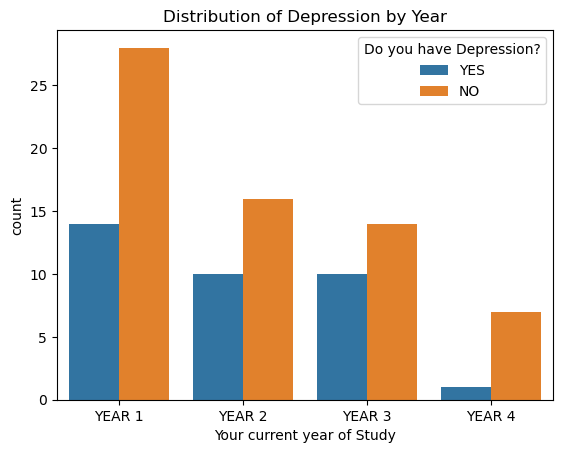

In [10]:
#Sub-Quesion 1

#Number of students with depression per year
sns.countplot(data=df, x='Your current year of Study', hue='Do you have Depression?')
plt.title('Distribution of Depression by Year')
plt.show()

Interprete the result

This bar chart illustrates the distribution of the mental health issue, depression, across different years of study among the surveyed students. It provides a visual representation of how these issues are more likely to affect students in various academic years. For instance, it shows whether students in their first year of study are more or less likely to experience these mental health concerns compared to those in subsequent years. The trend of this chart shows us that as the years go by, depression in those surveyed, lessens. It decreases heavily from year one to year two, but you'll see it very slightly climbs upwards in year three. However, the data tanks exponentially in the final year. This could very well be seen as schoolwork, projects, and due dates adding extra pressure among students. The preassure to keep your GPA up, that sticks with you until the very end. The decrease in depression could have something to do with an increase of accomplishment and pride as one moves along the ranks. And the simmilar, almost stagnent percentage in years two and three, could represent how even though it's less stressful than when you're completely inexperianced to the enviornment, the middle ground of the academic road comes with it's own stressful situations. 

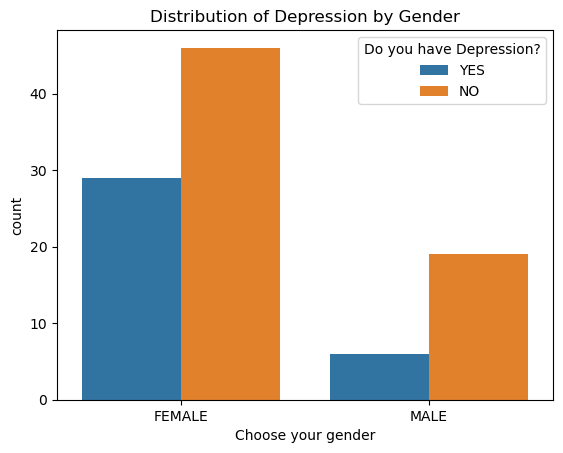

In [11]:
#Sub-Question 2

#Number of students with depression based on gender
sns.countplot(data=df, x='Choose your gender', hue='Do you have Depression?')
plt.title('Distribution of Depression by Gender')
plt.show()

Interprete the result

This bar chart showcases the distribution of the mental health issue, depression, among male and female students. Using it, we can figure out whether there are gender-based differences in the owning of the mental illness, depression. By comparing the counts for each condition between male and female students, we can clearly see that female students seem to deal with the effects of depression much more commonly than male students. This can be contributed to the fact that statistically, it has been proven, women are more emotionally expressive. It's not like all women are confirmed more emotional than men, but they are said to share their feelings more often than men. The trend of this graph also shows that more females were interviewed in general. This may skew the data, so when evaluating, we have to be careful.

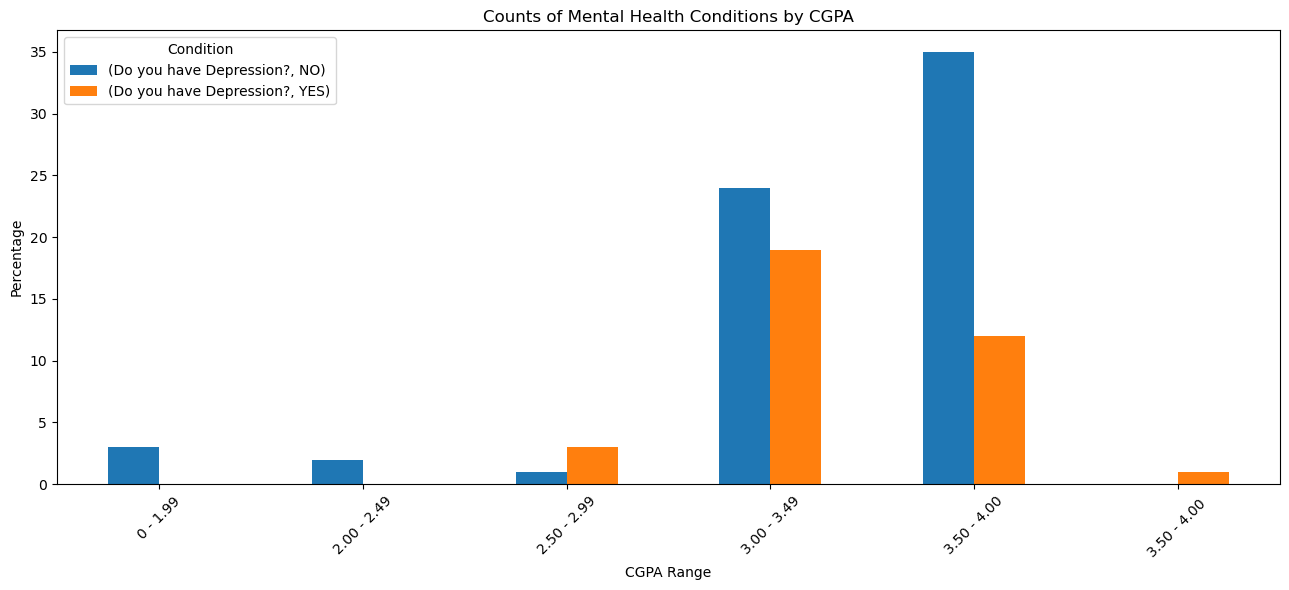

In [19]:
#Sub-Question 3

#Which issue among the crowd is most common, compared against each other

#Data is grouped by the CGPA value, and sorted through by the columns
grouped_data = df.groupby('What is your CGPA?').agg({
    'Do you have Depression?': 'value_counts',
}).unstack(fill_value=0)

#Bar graph creation
ax = grouped_data.plot(kind='bar', figsize=(13, 6), rot=45)
plt.title('Counts of Mental Health Conditions by CGPA')
plt.xlabel('CGPA Range')
plt.ylabel('Percentage')
plt.legend(title='Condition', loc='upper left')
plt.tight_layout()


plt.show()


Interprete the result

This bar chart contains a visual summary of the distribution of the given the mental health issue: depression. It presents the percentage breakdown of said condition, which should allow us to easily identify comparison among the surveyed students. In doing so, the graph shows a direct comparison between GPA and the rate of which students suffer from depression. The trend of this graph tells us that these attributes are most common in students with a GPA of 3.00 to 4.00. I hypothosise that since this is the usual average for a GPA, this means the students who have a gpa under the average probably do not get stressed or even care about their preformance. This would make sense to me, as these students in the higher categories, are probably faced with lots of stress when trying to keep up their GPA. Because depression is the most common attribute of the three by a smidge, I used it to represent the relationship between GPA and illness directly. 

Summary

With this dataset, there are lots of points we can infer. My main question for this research was "if student's mental health has a real effect on their academic performance". I'm quite convinced that it does, as I believe the first sub question answers a lot of our hypothesizes. The findings suggest that depression tends to decrease as students progress through their academic years, possibly due to the added pressure of schoolwork and GPA maintenance. Additionally, we can also infer that female students are more vocal, and possibly more effected by these factors. However, due to the data asking more female students in total, this data might not be accurate. In the future, a better set of data should ask each side equally, to get a better understanding of each perspective. We also went over how depression is the most common of the illnesses, enough to be the one we compare directly to scores. We have seen how the crowd is effected by these illnesses, but have mostly failed to make a solid foundation in comparing those effected with their general scores and grades. If we wanted to find out truly 'what' is effected, and not just 'how' those interviewed are effected. There is definetely more room for deeper exploration into this topic. As it's no doubt much more could be uncovered with plenty of other comparisons to draw from. You could even utilize points we dropped early on, such as marrital status, and what course is studied, to see if there are even more factors that play into the academic behvaior of students. In conclusion, this analysis provides a glimpse into the complex relationship between mental health and academic performance in students. It isn't perfect, but I have also found what else to research, to delve further into this topic. It goes deeper, as there are thousends of different factors that could play into one's behavior. But overall, mental issues like depression are some of the most impactful. 